In [1]:
import numpy as np
from PIL import Image, ImageOps
import math
import random

In [2]:
screen_width = 1000
screen_height = 1000
scale = 8000
offset_x = 500
offset_y = 100
color = (147, 112, 219)

In [3]:
def bar_coord(x, y, x0, y0, x1, y1, x2 ,y2):
    lambda0 = ((x - x2) * (y1 - y2) - (x1 - x2) * (y - y2)) / ((x0 - x2) * (y1 - y2) - (x1 - x2) * (y0 - y2))
    lambda1 = ((x0 - x2) * (y - y2) - (x - x2) * (y0 - y2)) / ((x0 - x2) * (y1 - y2) - (x1 - x2) * (y0 - y2))
    lambda2 = 1.0 - lambda0 - lambda1
    return(lambda0, lambda1, lambda2)

In [16]:
def draw_triangle(x0, y0, z0, x1, y1, z1, x2, y2, z2):
    xmin = max(0, int(min(screen_width, x0, x1, x2)))
    ymin = max(0, int(min(screen_height, y0, y1, y2)))
    xmax = min(screen_width, int(max(0, x0, x1, x2))) + 1
    ymax = min(screen_height, int(max(0, y0, y1, y2))) + 1
    for y in range(ymin, ymax):
        for x in range(xmin, xmax):
            l0, l1, l2 = bar_coord(x, y, x0, y0, x1, y1, x2, y2)
            if l0 >= 0 and l1 >= 0 and l2 >= 0:
                z = l0*z0 + l1*z1 + l2*z2
                if z > zbuffer[y][x]: 
                    continue
                else:
                    img_mat[y][x] = color
                    zbuffer[y][x] = z

In [5]:
def get_normal(x0, y0, z0, x1, y1, z1, x2, y2, z2):
    return np.cross((x1-x2, y1-y2, z1-z2), (x1-x0, y1-y0, z1-z0))

In [6]:
def get_cos_aqquracy_light(vec):
    light = (0, 0, 1)
    return np.dot(vec, light)/(np.linalg.norm(vec) * np.linalg.norm(light))

In [10]:
def get_vertex(vertex):
    x = vertex[0] * scale + offset_x
    y = vertex[1] * scale + offset_y
    z = vertex[2] * scale
    return (x,y,z)

In [17]:
# Кролик
img_mat = np.full((screen_height,screen_width,3), (230, 230, 250), dtype=np.uint8)
zbuffer = np.full((screen_height,screen_width), 100000)
file = open("assets/model_1.obj")
v = []
p = []
for s in file:
    sp = s.split(" ")
    if sp[0] == 'v':
        x, y, z = float(sp[1]), float(sp[2]), float(sp[3])
        v.append([x, y, z])
    if sp[0] == 'f':
        v1, v2, v3 = int(sp[1].split('/')[0]), int(sp[2].split('/')[0]), int(sp[3].split('/')[0])
        p.append([v1, v2, v3])

for k in range(len(p)):
    x0, y0, z0 = get_vertex(v[p[k][0]-1])
    x1, y1, z1 = get_vertex(v[p[k][1]-1])
    x2, y2, z2 = get_vertex(v[p[k][2]-1])
    
    normal = get_normal(x0, y0, z0, x1, y1, z1, x2, y2, z2)
    cos = get_cos_aqquracy_light(normal)
    color = (150, int(-255 * cos), 255)
    if cos < 0: draw_triangle(x0, y0, z0, x1, y1, z1, x2, y2, z2)

C:\Users\rogov\AppData\Local\Temp\ipykernel_6396\759665757.py:1: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(img_mat, mode='RGB')


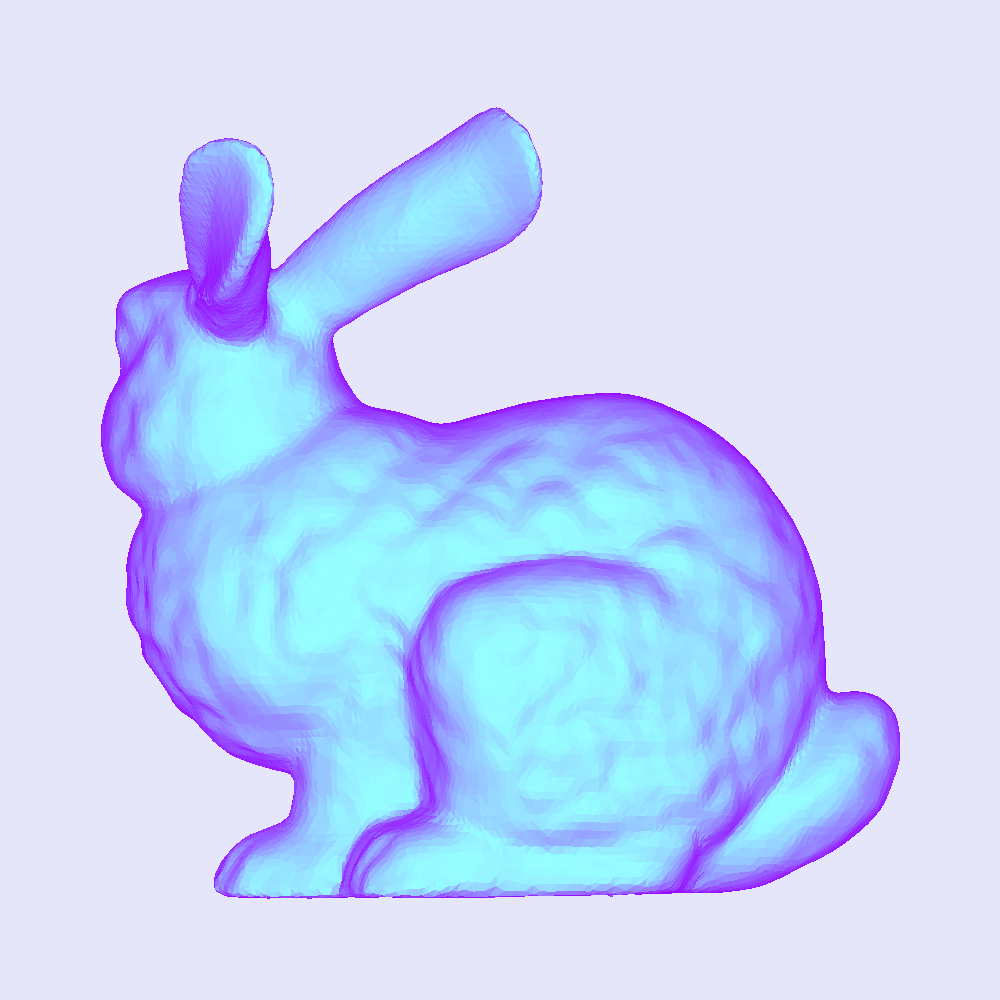

In [18]:
img = Image.fromarray(img_mat, mode='RGB')
img = ImageOps.flip(img)
display(img)

In [ ]:
img.save("dark.png")
img.show()